In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine
from rasterio.enums import Resampling
import pandas as pd
from scipy.optimize import curve_fit

from cmcrameri import cm

In [22]:
file = "Sudenitsa_altrad_AO2015.csv"
df = pd.read_csv(file)
df = df[df["emis"]>0]
df = df.sort_values(by=['pradius'])

In [24]:
print(df.columns)
data = df.to_numpy()
print(data[0])

Index(['FID', 'orbit', 'footprint', 'lat', 'lon', 'pradius', 'rms_slope',
       'ref', 'ref_corr', 'emis', 'oc2015', 'sc2015', 'cpr2015', 'cpr2015_n'],
      dtype='object')
[ 1.28410000e+04  1.86400000e+03 -3.41000000e+02  3.61284600e+01
  2.65320130e+02  6.04635250e+03  7.42228270e+00  1.73876610e-01
  0.00000000e+00  9.10543978e-01  1.30388999e+00  6.34826994e+00
  8.45687985e-01  2.10347995e-01]


In [86]:
elev_min = np.min(data[:,5])
elev_max = np.max(data[:,5])
elev_range = np.arange(int(elev_min), int(elev_max)+1, 1)
print(elev_min,elev_max, elev_range)

6046.3525 6059.3223 [6046 6047 6048 6049 6050 6051 6052 6053 6054 6055 6056 6057 6058 6059]


In [87]:
print(data.shape)
mean_data = np.zeros((len(elev_range-1), 8), dtype = np.float32)
stdev_data = np.zeros_like(mean_data)
print(mean_data)

(33046, 14)
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [88]:
min_idx = 0
for i in range(len(elev_range)):
    try:
        e = elev_range[i+1]
    except:
        break
 
    max_idx = np.argmax(np.where(data[:,5]<e))
    print(e, max_idx)
    if (max_idx - min_idx != 0) | (min_idx != 0):
        temp_data = data[min_idx:max_idx, 6:]
        print(temp_data.shape)
        mean_data[i, :] = np.mean(temp_data, axis = 0) 
        stdev_data[i, :] = np.std(temp_data, axis = 0) 

6047 0
6048 1
(1, 8)
6049 15
(15, 8)
6050 73
(73, 8)
6051 1139
(1139, 8)
6052 8621
(8621, 8)
6053 19566
(19566, 8)
6054 26105
(26105, 8)
6055 30741
(30741, 8)
6056 32819
(32819, 8)
6057 33030
(33030, 8)
6058 33036
(33036, 8)
6059 33041
(33041, 8)


In [92]:
print(elev_range.shape, mean_data.shape)

(14,) (14, 8)


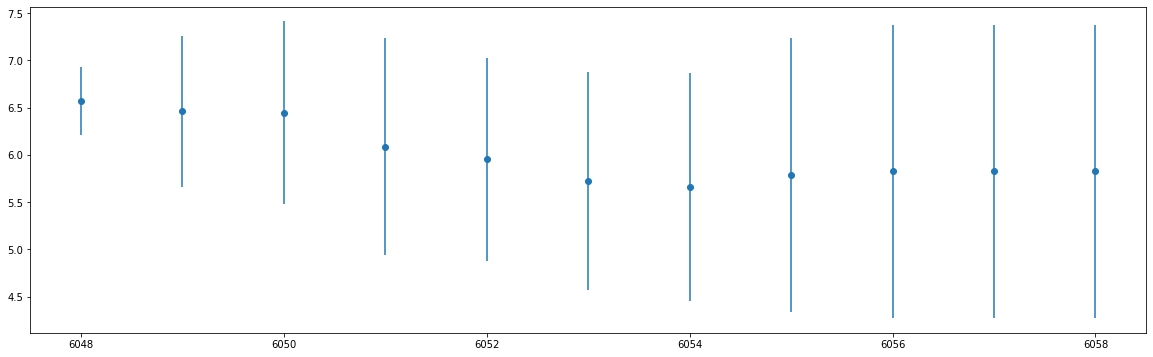

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,6)
cmap = cm.hawaii

ax.errorbar(elev_range[2:-1], mean_data[2:-1,-3], yerr= stdev_data[2:-1,-3], fmt='o')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20,6)
cmap = cm.hawaii

df.plot.scatter('emissivity', 'pradius', c="rms_slope", cmap=cmap, alpha = 0.6, s=5,  ax = ax[0])
df.plot.scatter('reflectivity', 'pradius', cmap=cmap, alpha = 0.6, s=5,  ax = ax[1])
df.plot.scatter('rms_slope', 'pradius', cmap=cmap, alpha = 0.6, s=5,  ax = ax[2])
ax[1].set_xlim(0,0.6)
plt.title("sudenitsa")
plt.show()

In [ ]:
def exp_fit(x,a,b,c):
    # return a*x**2 + b*x + c
    # return a*np.exp(-b*x)
    return (a)/(1+b*np.exp(c*x))

prad = df.pradius.to_numpy() - 6051.8
emis = df.emissivity.to_numpy()
popt, pcov = curve_fit(exp_fit, prad, emis)
print(popt, pcov)
x = np.linspace(-3, 6, 100)
y = exp_fit(x, *popt)
plt.scatter(prad, emis, alpha = 0.6, s=5)
# plt.plot(prad, exp_fit(prad, *popt), 'k')
plt.plot(x, y, 'k')
plt.show()

In [ ]:
plt.scatter(prad, emis / exp_fit(prad, *popt), c=df.rms_slope, cmap=cm.tokyo, alpha = 0.6, s=5)
plt.colorbar()
plt.ylim(0.7,1.2)